# Демонстрация возможностей блокнота Jupyter

[Лама и 23 хомяка](https://obnimorda.ru)

В этом примере к [Руководству по работе с блокнотом Jupyter на русском языке](https://obnimorda.ru/guides/jupyter/) мы применяем и описываем следующие возможности блокнота Jupyter:

* оформление блоков текста с помощью языка разметки Markdown;
* запись математических формул в TeX-нотации;
* расчеты и построение графиков с использованием библиотек NumPy, Matplotlib;
* экспорт файла блокнота в HTML.

## Рисование розы в полярной системе координат

### Уравнение розы

**Роза** — [плоская кривая](https://ru.wikipedia.org/wiki/Роза_\(плоская_кривая\)), напоминающая цветок.

В полярной системе координат «розовидная» кривая описывается уравнением:

${\displaystyle r(\theta) = a \cdot \sin\left(k \cdot \theta \right),}$

где:

* $r$ — радиус;
* $\theta$ — угол;
* $a$ — коэффициент, определяющий размер лепестков;
* $k$ — коэффициент, определяющий количество лепестков.

Для дробного $k$ уравнение может быть записано так:

${\displaystyle r(\theta) = a \cdot \sin\left(\frac{n}{d} \cdot \theta\right).}$

### Пятилепестковая роза

Мы нарисуем розу с помощью кода на Python. В расчетах используем библиотеку [NumPy](https://numpy.org/), а для построения графиков — [Matplotlib](https://matplotlib.org/).

In [3]:
# Установите библиотеки, если они не установлены
# !pip3 install numpy matplotlib

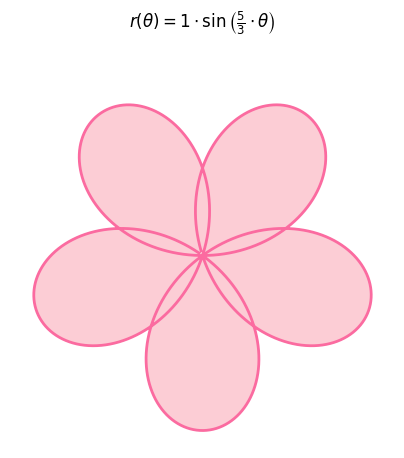

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры розы
# Вычисление массива значений угла theta: здесь для выбранной формы нужно 3 полных оборота
t = 3
theta = np.linspace(0, t * 2 * np.pi, 1000)

# Коэффициенты: роза с 5 округлыми пересекающимися лепестками, максимальная длина лепестка равна 1
a = 1
n = 5
d = 3
k = n / d

# Вычисление массива значений радиуса
r = a * np.sin(k * theta)

# Настройка и вывод графика
# Создание фигуры и полярной системы координат для построения графика
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})

# Установка параметров полярной оси: начало в 0, максимальная длина 1.1
ax.set_rlim(0,1.1)

# Отрисовка лепестков с заполнением
ax.fill(theta, r, color='#f98298', alpha=0.4)

# Отрисовка лепестков сплошной линией
ax.plot(theta, r, color='#fb6ba0', linewidth=2)

# Добавление заголовка с формулой, использующей заданные коэффициенты
ax.set_title(fr"$r(\theta) = {a} \cdot \sin\left(\frac{{{n}}}{{{d}}} \cdot \theta\right)$")

# Сокрытие осей и сетки графика
ax.axis('off')

# Отображение графика
plt.show()

Попробуйте изменить параметры $n$ и $d$, чтобы увидеть, как они влияют на форму розы. Если роза получается незавершенной, увеличьте количество оборотов $t$.

### Розы с четным количеством лепестков

Если мы зададим четное $k$, $n$ или $d$, чтобы нарисовать розу с четным количеством лепестков, равным $2k$ или $2n$, то обнаружим, что лепестков получается в два раза меньше. Это происходит потому, что для углов $k \cdot \theta$ в диапазоне $(\pi; 2\pi)$ синус отрицателен — следовательно, для этих углов мы получаем отрицательный радиус.

Для изображения отрицательных значений радиуса в полярной системе координат с началом (полюсом) в нуле существует два подхода:

1. Отрицательные значения игнорируются.
2. Отрицательные значения берутся по модулю и отражаются через полюс координат (поворот на $\pi$).

Когда начало координат установлено в $0$, библиотека Matplotlib следует первому подходу и не отображает отрицательные значения радиуса, поэтому мы видим всего $k$ или $n$ лепестков.

Чтобы использовать второй подход, нужно:

* вычислить модуль радиуса;
* прибавить $\pi$ к значениям углов, синус которых отрицателен.

Модифицируем код, чтобы нарисовать с помощью этого подхода [квадрифолий](https://ru.wikipedia.org/wiki/Квадрифолий), или четырехлистник.

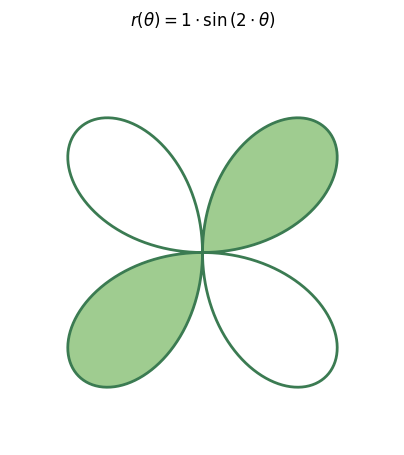

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры квадрифолия
# Вычисление массива значений угла theta: для этой формы достаточно 1 оборота
t = 1
theta = np.linspace(0, t * 2 * np.pi, 1000)

# Коэффициенты: 4 лепестка, максимальная длина лепестка равна 1
a = 1
k = 2

# Вычисление массива значений радиуса
r = a * np.sin(k * theta)

# Поворот углов на π для отрицательных значений радиуса
theta_rotated = np.where(r < 0, theta + np.pi, theta)

# Вычисление модуля для радиусов
r_abs = np.abs(r)

# Настройка и вывод графика
# Создание фигуры и полярной системы координат для построения графика
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})

# Установка параметров полярной оси: начало в 0, максимальная длина 1.1
ax.set_rlim(0,1.1)

# Отрисовка лепестков с заполнением: будут видны только лепестки для углов с неотрицательным значением синуса (r ≥ 0)
ax.fill(theta, r, color='#5fab47', alpha=0.6)

# Отрисовка всех лепестков сплошной линией
ax.plot(theta_rotated, r_abs, color='#3b7b52', linewidth=2)

# Добавление заголовка с формулой, использующей заданные коэффициенты
ax.set_title(fr"$r(\theta) = {a} \cdot \sin\left({k} \cdot \theta \right)$")

# Сокрытие осей и сетки графика
ax.axis('off')

# Отображение графика
plt.show()

Поэкспериментируйте с дробным $k$, задавая четное $n$ или $d$. Увеличьте количество оборотов $t$, если роза выглядит незавершенной.

## Экспорт в HTML

После завершения работы над проектом файл блокнота можно экспортировать в формат, удобный для публикации или распространения. Для примера мы используем экспорт в HTML — этот способ не требует установки дополнительных пакетов и доступен как в веб-интерфейсе Jupyter, так и в Visual Studio Code.

### Веб-интерфейс Jupyter

Нажмите **File** > **Save and Export Notebook As** > **HTML** — файл будет сохранен под тем же именем, что и файл блокнота, с расширением `.html`.

### Visual Studio Code

1. В меню действий блокнота нажмите **···**, выберите **Экспорт** / **Export**, затем **HTML**.
2. Выберите директорию для сохранения, введите имя файла и нажмите кнопку **Экспорт**.

### Командная строка

В активированной виртуальной среде с установленными компонентами Jupyter выполните команду с указанием пути к файлу блокнота. Мы экспортируем файл `rose.ipynb`, который находится в текущей рабочей директории:

```bash filename="(.venv) my_project>"
jupyter nbconvert --to html rose.ipynb
```